<a href="https://colab.research.google.com/github/martabarbosa1/Dashboard-Dojo/blob/main/M_alldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
### Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [54]:
### Load the Datasets
#originalyy downloaded from https://www.kaggle.com/datasets/sherrytp/airline-delay-analy
df2016 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2016.csv')
df2017 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2017.csv')
df2018 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2018.csv')

### Quick preprocessing
df_all = pd.concat([df2016,df2017,df2018], ignore_index = True, axis = 0)
df_all.drop(['Unnamed: 0','CANCELLED','DIVERTED'], axis=1, inplace= True)
df_all.dropna(inplace=True)
df_all['FL_DATE'] = pd.to_datetime(df_all['FL_DATE'])
df_all['Airline'] = df_all['OP_CARRIER'].apply(lambda x: 'Delta Airlines' if x == 'DL' else 'Southwest Airlines' if x=='WN' else 'American Airlines' if x=='AA'
else 'JetBlue Airways' if x=='B6' else 'SkyWest Airlines' if x=='OO' else 'Atlantic Southeast Airlines' if x == 'EV' else 'United Airlines' if x == 'UA'
else 'Pinnacle Airlines' if x == '9E' else 'Spirit Airlines' if x== 'NK' else 'Alaska Airlines' if x == 'AS' else 'Virgin America' if x == 'VX' else 'Frontier' if x =='F9'
else 'Republic Airlines' if x == 'YX'else 'Hawaiian Airlines' if x == 'HA' else 'Envoy Air' if x == 'MQ' else 'Air Shuttle' if x == 'YV' else 'Allegiant Air' if x=='G4'
else 'Comair')
df_all.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,AIR_TIME,DISTANCE,Airline
0,2016-01-01,DL,ATL,GRR,2125,2130.0,5.0,2321,2319.0,92.0,640.0,Delta Airlines
1,2016-01-01,DL,LAX,ATL,2255,2256.0,1.0,600,547.0,207.0,1947.0,Delta Airlines
2,2016-01-01,DL,ATL,BNA,1233,1356.0,83.0,1239,1402.0,38.0,214.0,Delta Airlines
3,2016-01-01,DL,ATL,JAX,945,946.0,1.0,1050,1053.0,45.0,270.0,Delta Airlines
4,2016-01-01,DL,ATL,OKC,2110,2107.0,-3.0,2236,2224.0,116.0,761.0,Delta Airlines


##1) EDA

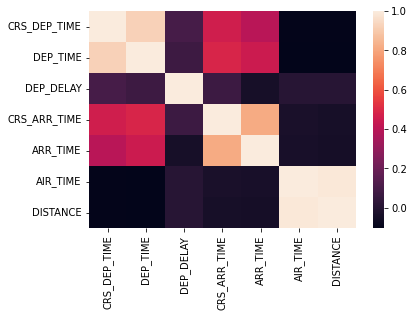

In [55]:
#check correlations
sns.heatmap(df_all.corr())

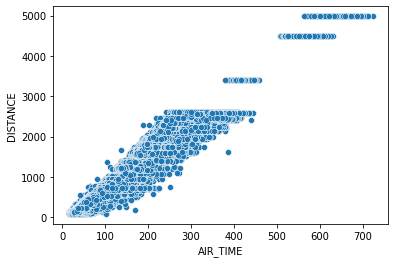

In [56]:
#see better the corr between distance and air time
sns.scatterplot(data = df_all, x = 'AIR_TIME', y = 'DISTANCE')

In [58]:
df_all.info()
#around 2M rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080873 entries, 0 to 2109730
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   FL_DATE       datetime64[ns]
 1   OP_CARRIER    object        
 2   ORIGIN        object        
 3   DEST          object        
 4   CRS_DEP_TIME  int64         
 5   DEP_TIME      float64       
 6   DEP_DELAY     float64       
 7   CRS_ARR_TIME  int64         
 8   ARR_TIME      float64       
 9   AIR_TIME      float64       
 10  DISTANCE      float64       
 11  Airline       object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 206.4+ MB


In [60]:
df_all['FL_DATE'].nunique()/365
#3 years of data as expected (2018, 2017, 2016)

3.0027397260273974

In [63]:
df_all['OP_CARRIER'].nunique()
#18 airline companies

18

In [64]:
df_all['ORIGIN'].nunique()
#we only chose 3 top US airlines due to the amount of data (ATL, LAX and JFK)

3

In [65]:
df_all['DEST'].nunique()
#there are 208 destinies with delays from these 3 airports

208

In [78]:
df_all[df_all['DEP_DELAY'] > 0]['DEP_DELAY'].count()
#773988 are delays

df_all[df_all['DEP_DELAY'] < 0]['DEP_DELAY'].count()
#1175600 are leaving earlier

1175600

KeyboardInterrupt: ignored

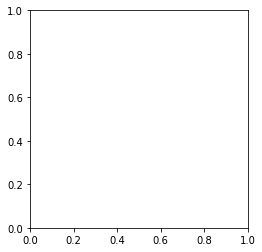

In [81]:
plt.pie(df_all)

In [9]:
#TODO change time categorys to datetime (CRS_DEP_TIME, DEP_TIME, CRS_ARR_TIME, ARR_TIME)

#1.1) Airports that have more delays/distance

In [ ]:
#companies/airport that have more delays/distance

In [50]:
#airport ATL
#167 destinations with delays
#the sum of delays by destination range from 61 (PSP) up to 360408 minutes (EWR)
df_airport_ATL_g = df_all[df_all['ORIGIN'] == 'ATL'].groupby('DEST')['DEP_DELAY'].sum()

df_airport_ATL_g = df_airport_ATL_g.sort_values(ascending = False)

DEST
EWR    360408.0
LGA    360265.0
MCO    261360.0
BOS    251858.0
ORD    236836.0
         ...   
FCA       183.0
RAP       169.0
SCE        96.0
ELM        91.0
PSP        61.0
Name: DEP_DELAY, Length: 167, dtype: float64

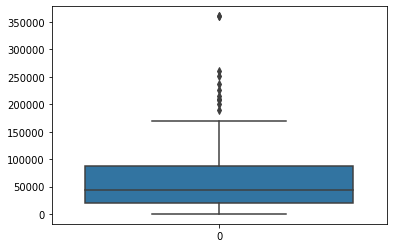

In [52]:
sns.boxplot(data = df_airport_ATL_g)

In [53]:
df_airport_ATL_g.describe()

count       167.000000
mean      63460.395210
std       64655.427568
min          61.000000
25%       19751.000000
50%       44217.000000
75%       86647.000000
max      360408.000000
Name: DEP_DELAY, dtype: float64

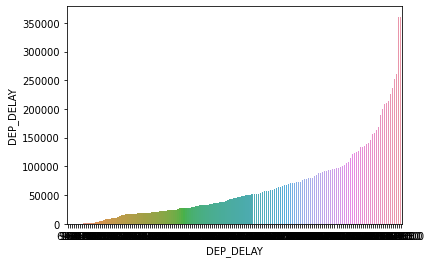

In [51]:
sns.barplot(data = df_airport_ATL_g, x = df_airport_ATL_g.index, y = df_airport_ATL_g)

In [83]:
df_airport_ATL_p = df_all.pivot_table(values = 'DEP_DELAY', index = ['ORIGIN', 'DEST'], aggfunc = 'sum').sort_values(by = 'DEP_DELAY', ascending = False)
df_airport_ATL_p
#the route that gets more delays is LAX to SFO with a total of 784071 minutes delayed
#the route that leaves early more times is JFK to SNA with a total of 281 minutes

DEP_DELAY
ORIGIN DEST Airline                      
ATL    EWR  Delta Airlines       236562.0
       LGA  Delta Airlines       233796.0
LAX    SFO  Southwest Airlines   212361.0
       OAK  Southwest Airlines   181341.0
       JFK  Delta Airlines       165150.0
...                                   ...
       PHL  Virgin America         -174.0
JFK    SNA  Delta Airlines         -218.0
       SJC  Delta Airlines         -287.0
ATL    PDX  Alaska Airlines        -294.0
LAX    AUS  United Airlines        -590.0

[995 rows x 1 columns]

In [89]:
df_airport_ATL_p = df_all.pivot_table(values = 'DEP_DELAY', index = ['ORIGIN', 'DEST', 'Airline'], aggfunc = 'sum').sort_values(by = 'DEP_DELAY', ascending = False)
df_airport_ATL_p
#the airline with the route that has more delays is Delta Airlines from ATL to EWR (236562 min total, wich represent a mean of 226 minutes/flight delayed)
#the United Airlines with the route from LAX to AUS is the one that leaves earlier (590 minutes earlier/wich represents a mean of 12 minutes eaarlier/fligth that lef earlier)

DEP_DELAY
ORIGIN DEST Airline                      
ATL    EWR  Delta Airlines       236562.0
       LGA  Delta Airlines       233796.0
LAX    SFO  Southwest Airlines   212361.0
       OAK  Southwest Airlines   181341.0
       JFK  Delta Airlines       165150.0
...                                   ...
       PHL  Virgin America         -174.0
JFK    SNA  Delta Airlines         -218.0
       SJC  Delta Airlines         -287.0
ATL    PDX  Alaska Airlines        -294.0
LAX    AUS  United Airlines        -590.0

[995 rows x 1 columns]

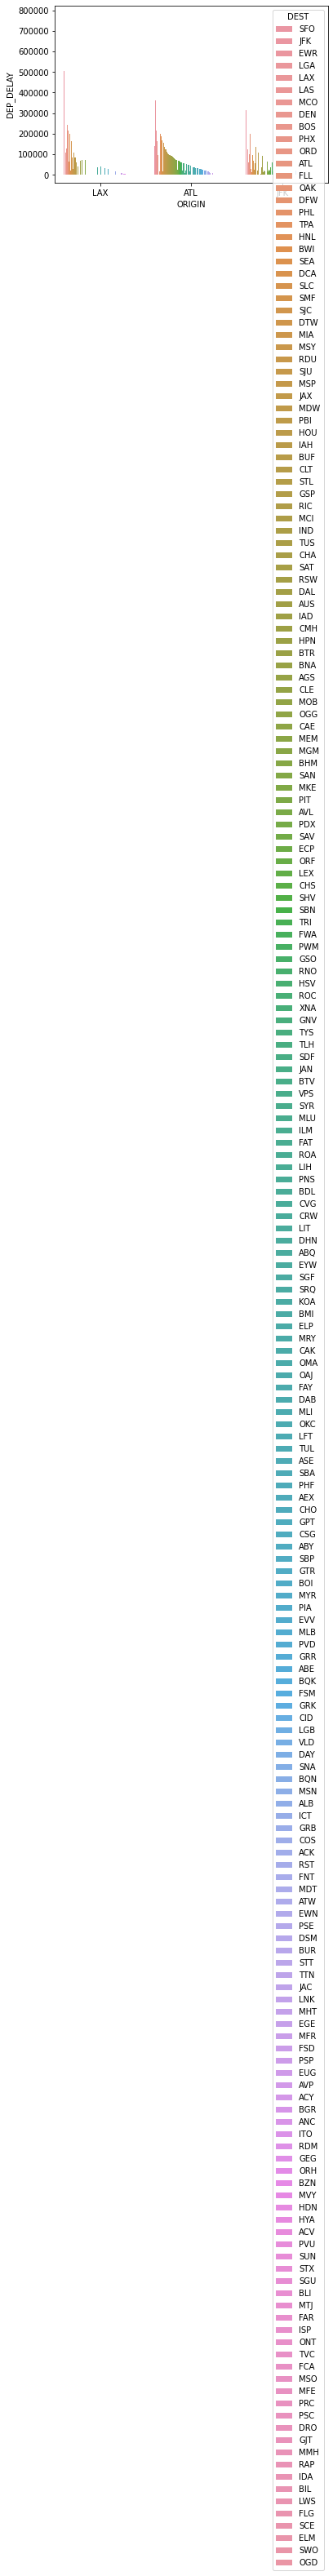

In [37]:
df_test = df_airport_ATL_p.reset_index()

sns.barplot(data = df_test, x = 'ORIGIN'	, y = 'DEP_DELAY', hue = 'DEST')